In [ ]:
#generate the impeadance data for a two step profile with delta= 0.5
#plot the phase angle vs freq, bode plot for the generated data

#open the Basudevs Paper and study what the method of dip angle analysis is
#see the bode plot and using the method of dip angle analysis, predict the 2-step profile which fits this data , predict the lin and inv-lin using the dip angle analysis

39.86979930642722
5.130200693572782


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


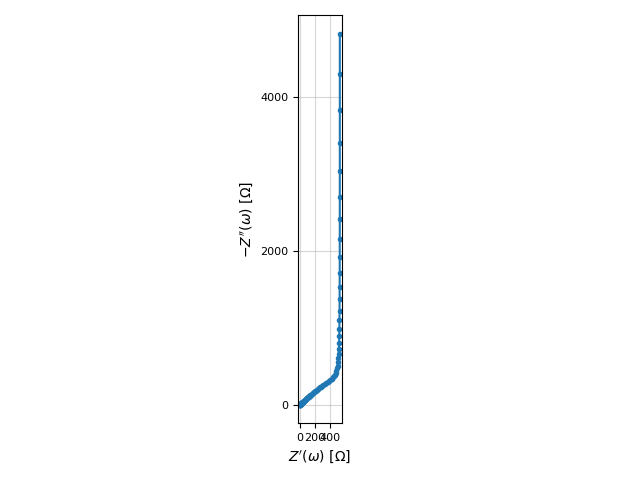

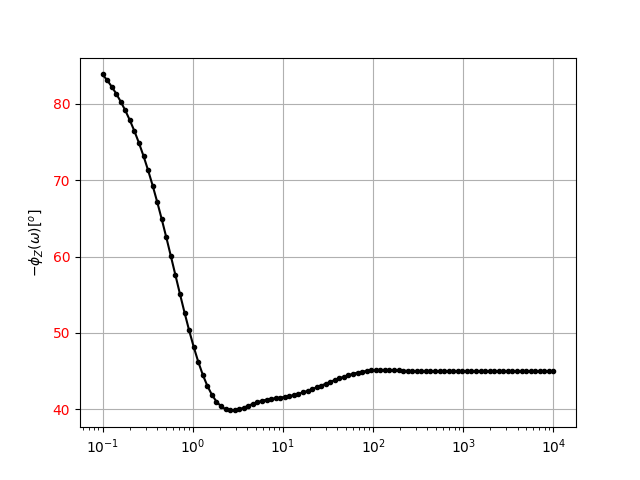

In [13]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp


#gen data

freq_list=np.logspace(-1,4,100)

Q=6.61e-4
alpha=1

R1=5.22*194.5
delta1=0.12
R2=3.47*194.5
delta2=0.17
R3=2.15*194.5

Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit="TLMtwo_1")

zexp=cmodel.predict(frequencies=freq_list)

fig= plt.figure()
ax_nyq=fig.add_subplot()

fig2 = plt.figure()
ax_phs=fig2.add_subplot()

#plot nyquist plot of the taken data
plot_nyquist(zexp,ax=ax_nyq,labelsize=10,ticksize=8)

#plot bode plot of the taken data
ax_phs.plot(freq_list, -np.angle(zexp, deg=True), '.-',color="black")
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$' + r'$[^o]$', fontsize=10,color="black")
ax_phs.set_xscale('log')
ax_phs.tick_params(axis='y', labelcolor="red")
ax_phs.grid()
fig.tight_layout()

print(np.min(-np.angle(zexp,deg=True)))
dip_angle = alpha*45-np.min(-np.angle(zexp,deg=True))
print(dip_angle)